In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Empirical distributions 

Empirical distributions are distributions of observed data.

We will illustrate this with salary data from City of Chicago:

https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

Recall that we edited the file by removing part-time and hourly employees. We also removed the column showing the names of the employees.

In [ ]:
# read the data and show 5 random rows
chicago_df = pd.read_csv('ChicagoSalary.csv')
chicago_df.sample(5)

In [ ]:
chicago_bins = np.arange(10000, 280000, 10000)
chicago_df.hist('Annual.Salary', bins = chicago_bins);

In [ ]:
# extract salaries and calculate average salary
salary=chicago_df['Annual.Salary']
np.mean(salary)

What happens if we look at the distribution of observations (salaries) in a sample? It is called **empirical distribution** of the data in the sample.

In [ ]:
# Histogram of empirical distributions of 10 random salaries
chicago_df.sample(10).hist('Annual.Salary', bins = chicago_bins);

In [ ]:
# Histogram of empirical distributions of 100 random salaries
chicago_df.sample(100).hist('Annual.Salary', bins = chicago_bins);

In [ ]:
# Histogram of empirical distributions of 1000 random salaries
chicago_df.sample(1000).hist('Annual.Salary', bins = chicago_bins);

## Notes

- As the sample size increases, the empirical histogram of the sample more closely resembles the histogram of the population. 
- In a random sample, you don't always capture well extreme values in the population.

## Empirical distribution of a statistic

Frequently, we are interested in numerical quantities associated with a population - these are called **parameters**:

- What is the average salary in City of Chicago?
- What is the median salary in City of Chicago?
- What is the percent of people who will vote for candidate T in the next election?


To learn about the value of an unknown parameter, we rely on functions of the data - these are called **statistics**:

- Sample mean
- Sample median
- Sample proportion

Different samples could lead to different values of the statistic, and it is important to understand the distribution of the statistic. This knowledge can be used to assess the **"quality of your parameter estimates".**
 
### Average  and median salary

- Our dataset is the population of salaries 
- Use simulations to understand the **probability distribution** of the sample mean and sample median

In [ ]:
np.mean(np.random.choice(salary, 10))

In [ ]:
# we create a function that will simulate nsim simulations of sample means
# it takes as input the sample size (n) and number of simulations (nsim)
def salary_mean_sim(n,nsim):
    """Simulates nsim repetions of samples of size n, returns their sample mean."""
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, np.mean(np.random.choice(salary, n)))
    return outcomes


In [ ]:
salary_mean_sim(10,3)

Important concepts:
- sampling variability: the value of a statistic varies with different samples.
- how can I learn about the probability distribution of the sample mean?

In [ ]:
# try nsim=100, 1000, 10000
bins = np.linspace(70000, 120000, 50)

plots.hist(salary_mean_sim(10,100), bins)
plots.title("10000 samples of size n=10")
plots.xlabel('Annual salary sample mean')
plots.show()


In [ ]:
bins = np.linspace(70000, 120000, 50)
#bins = np.linspace(86000, 102000, 50)

plots.hist(salary_mean_sim(100,10000), bins)
plots.title("Samples of size n=100")
plots.xlabel('Annual salary sample mean')
plots.show()

In [ ]:
# where are these distributions centered?
np.mean(salary_mean_sim(10,1000)), np.mean(salary_mean_sim(100,1000))

Distribution of the sample mean:
- centered at population mean (avg salary in Chicago)
- spread decreases with sample size 
- shape - bell shaped (normal distribution)

### Is the sample median (n=10, 100) useful for learning about the population median?



In [ ]:
# median salary
np.median(salary)

In [ ]:
#  a function that will simulate nsim simulations of sample medians
def salary_median_sim(n,nsim):
    """Simulates nsim repetions of samples of size n, returns their sample median."""
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, np.median(np.random.choice(salary, n)))
    return outcomes


In [ ]:
salary_median_sim(10,5)

In [ ]:
# try nsim=100, 1000, 10000
bins = np.linspace(70000, 120000, 50)

plots.hist(salary_median_sim(10,100), bins)
plots.title("Samples of size n=10")
plots.xlabel('Annual salary sample median')
plots.show()


In [ ]:
# increase sample size to 100

bins = np.linspace(70000, 120000, 50)
#bins = np.linspace(82000, 96000, 40)

plots.hist(salary_median_sim(100,100), bins)
plots.title("Samples of size n=100")
plots.xlabel('Annual salary sample median')
plots.show()

In [ ]:
# where are these distributions centered?
np.mean(salary_median_sim(10,1000)), np.mean(salary_median_sim(100,1000))

In [ ]:
# is the sample maximum a good estimator for the population maximum
np.max(chicago_df.sample(1000)['Annual.Salary'])

The issues of sample and population maximum will be investigated in homework.

### Sampling from a population of labels

Recall that last lecture we wrote a function for poll simulations.

Use this function to recreate the histograms shown in the slides done this lecture.

In [ ]:
vote=['Biden','Trump']

def election_sim(n,PB,nsim):
    """Simulates nsim repetions of polls of size n, returns their sample proportion."""
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, sum(np.random.choice(vote, n, p=[PB, 1-PB])=='Biden'))
    return outcomes/n


In [ ]:
plots.hist(election_sim(100,0.5,10000),bins=np.arange(0.35,0.65,0.01))
plots.title("Polls of size n=100")
plots.xlabel('Proportion of votes')
plots.show()

## Birth rates and exploratory data analysis (if time allows)

Exploratory data analysis:
- Initial investigation of data
- Often done with visualizations of data
- Used for pattern discovery, outliers
- Model assumptions checking 
- Selection of appropriate analytical tools
- Suggest hypotheses about causes of observed phenomena 

**Caution**: data dredging, data fishing, p-hacking (related to multiple comparison/testing).

Recall from previous lectures:

In [ ]:
#read census data (available from census.gov)
full = pd.read_csv('nc-est2014-agesex-res.csv')

#all the commands that follow are copied from the lecture 4 notebook (part 2)
partial = full[['SEX','AGE','POPESTIMATE2010','POPESTIMATE2014' ]]
simple= partial.rename(columns = {'POPESTIMATE2010':'2010','POPESTIMATE2014':'2014'})
no_999 = simple.query('AGE < 999')
everyone = no_999.query('SEX == 0').drop(columns=['SEX','2010'])
males = no_999.query('SEX == 1').drop(columns=['SEX','2010'])
females = no_999.query('SEX == 2').drop(columns=['SEX','2010'])
males = males.rename(columns = {'2014':'MALES'})
females = females.rename(columns ={'2014':'FEMALES'})
pop_2014 = pd.merge(females,males, on='AGE')
pop_2014.plot('AGE',color=['r','b'],figsize=(13,9));

## Sex differences at birth and in the general population 

<br>
<div>
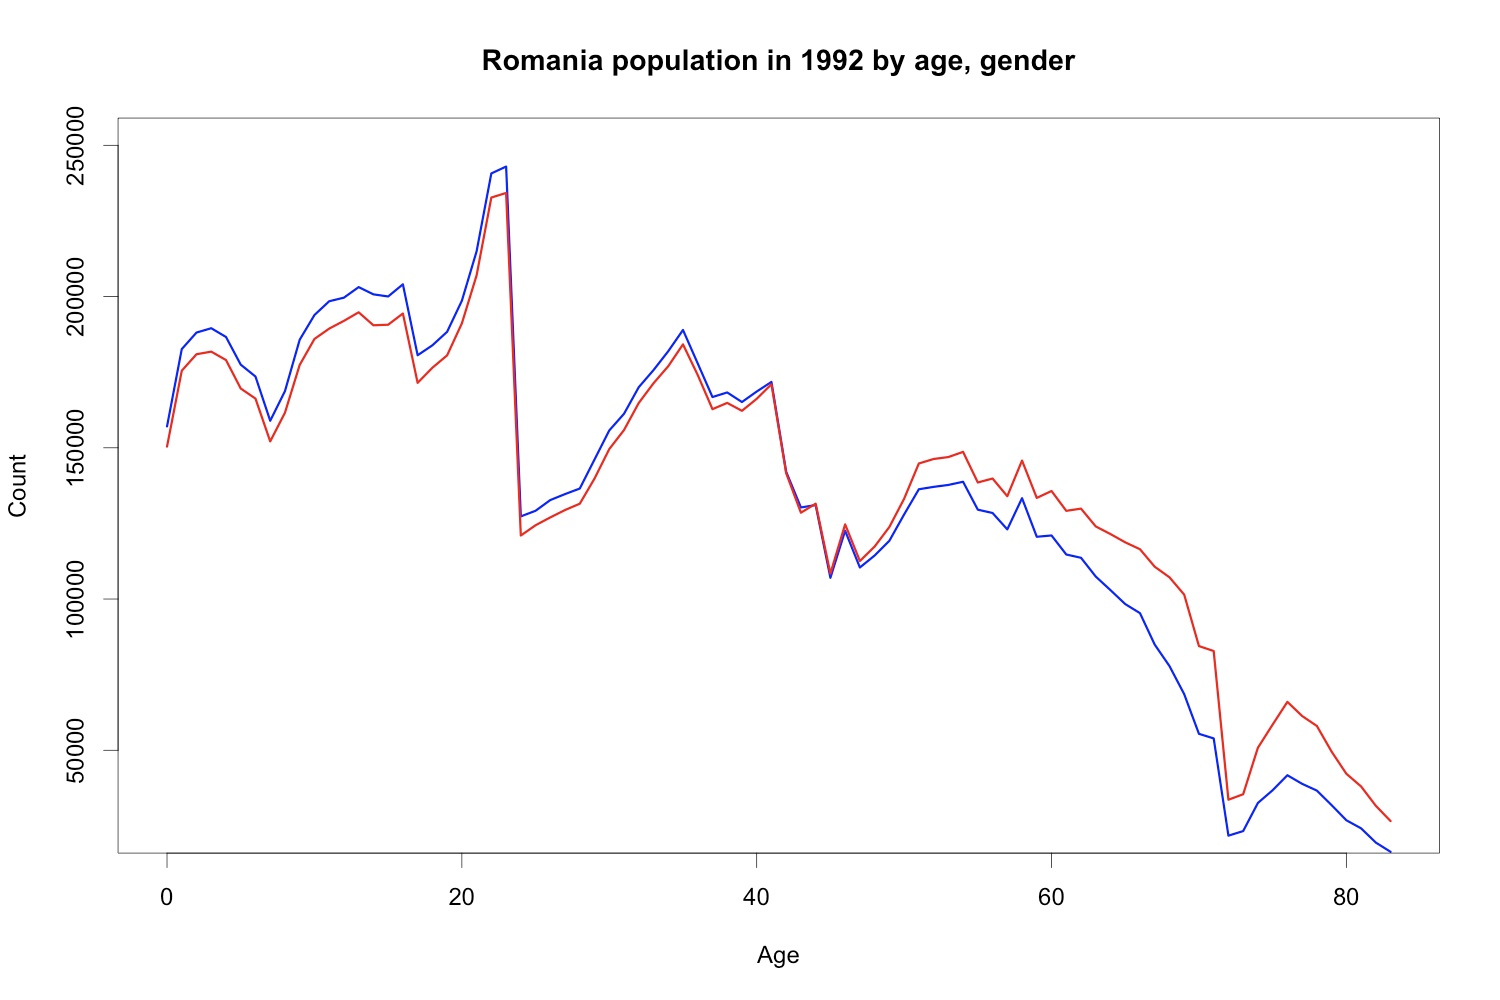
</div>
<br> 


<br>
<div>
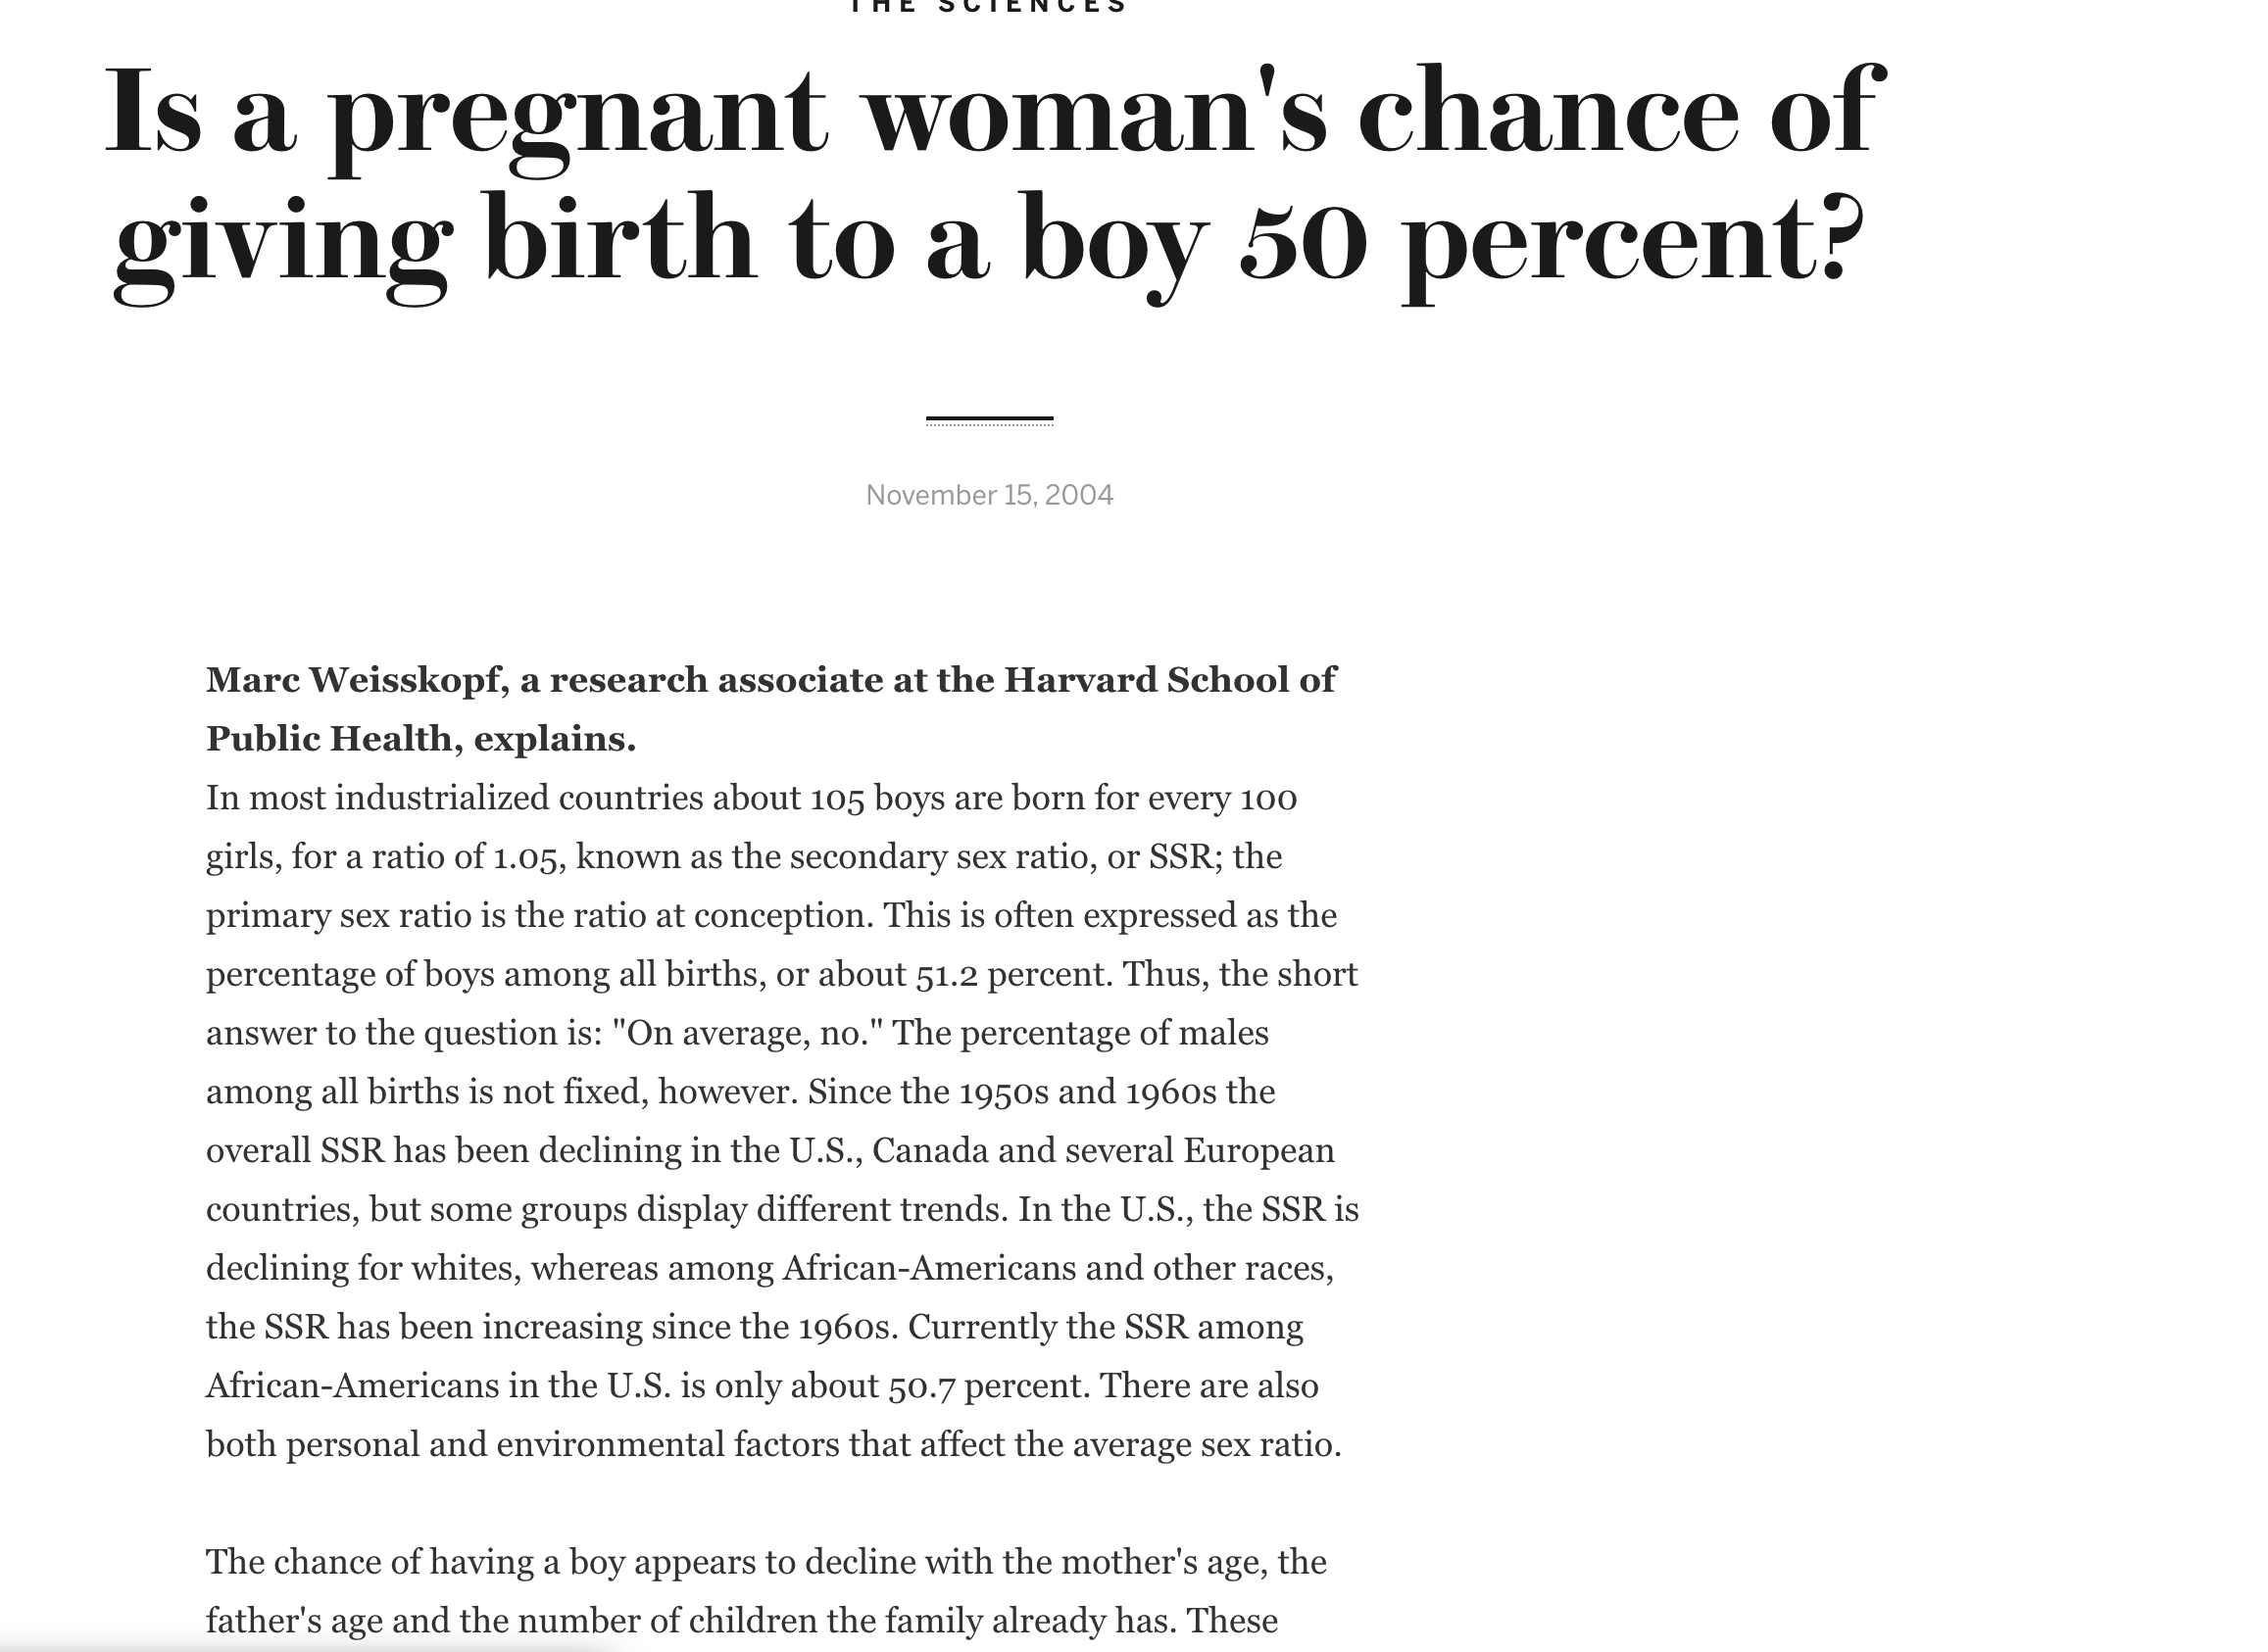
</div>
<br> 


<br>

More information on [sex ratio](https://en.wikipedia.org/wiki/Sex_ratio) and a controversial [PNAS article](https://www.pnas.org/content/112/16/E2102)


<br>


## To investigate the secondary sex ratio, we downloaded the breakdown of 2016 births from CDC:

https://wonder.cdc.gov/natality.html



In [ ]:
#data from CDC
natality2016=pd.read_csv("Natality2016.csv")
natality2016.head(8)


In [ ]:
natality2016[['Gender.Code','Births']].groupby('Gender.Code').sum()

In [ ]:
# SSR
2016003/1925598


In [ ]:
natality2016[(natality2016['State']=='Illinois') & (natality2016['Single.Race']=='White')]

In [ ]:
# SSR for White mothers over 40 years old
(1811+121)/(1823+107+11)

### Do we have evidence of decreased SSR in this selected group? 

In [ ]:
#number of births in that group
(1811+121+1823+107+11)

In [ ]:
3873*0.512
